## 1. Import needed libraries.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data ingestion.

In [47]:
pima_df = pd.read_csv('diabetes.csv')


In [48]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
pima_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [50]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
pima_df.shape

(768, 9)

In [52]:
pima_df.rename(columns = {'Pregnancies': 'Preg','BloodPressure': 'BP', 'SkinThickness': 'Skin', 'DiabetesPedigreeFunction':'DPF', 'Outcome':'Class'}, inplace = True)

pima_df.head(1)


,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1


In [53]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   Glucose  768 non-null    int64  
 2   BP       768 non-null    int64  
 3   Skin     768 non-null    int64  
 4   Insulin  768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. Data Pre-processing.

In [54]:
#Analyze a single column
bmi_df = pima_df['BMI']
bmi_df.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


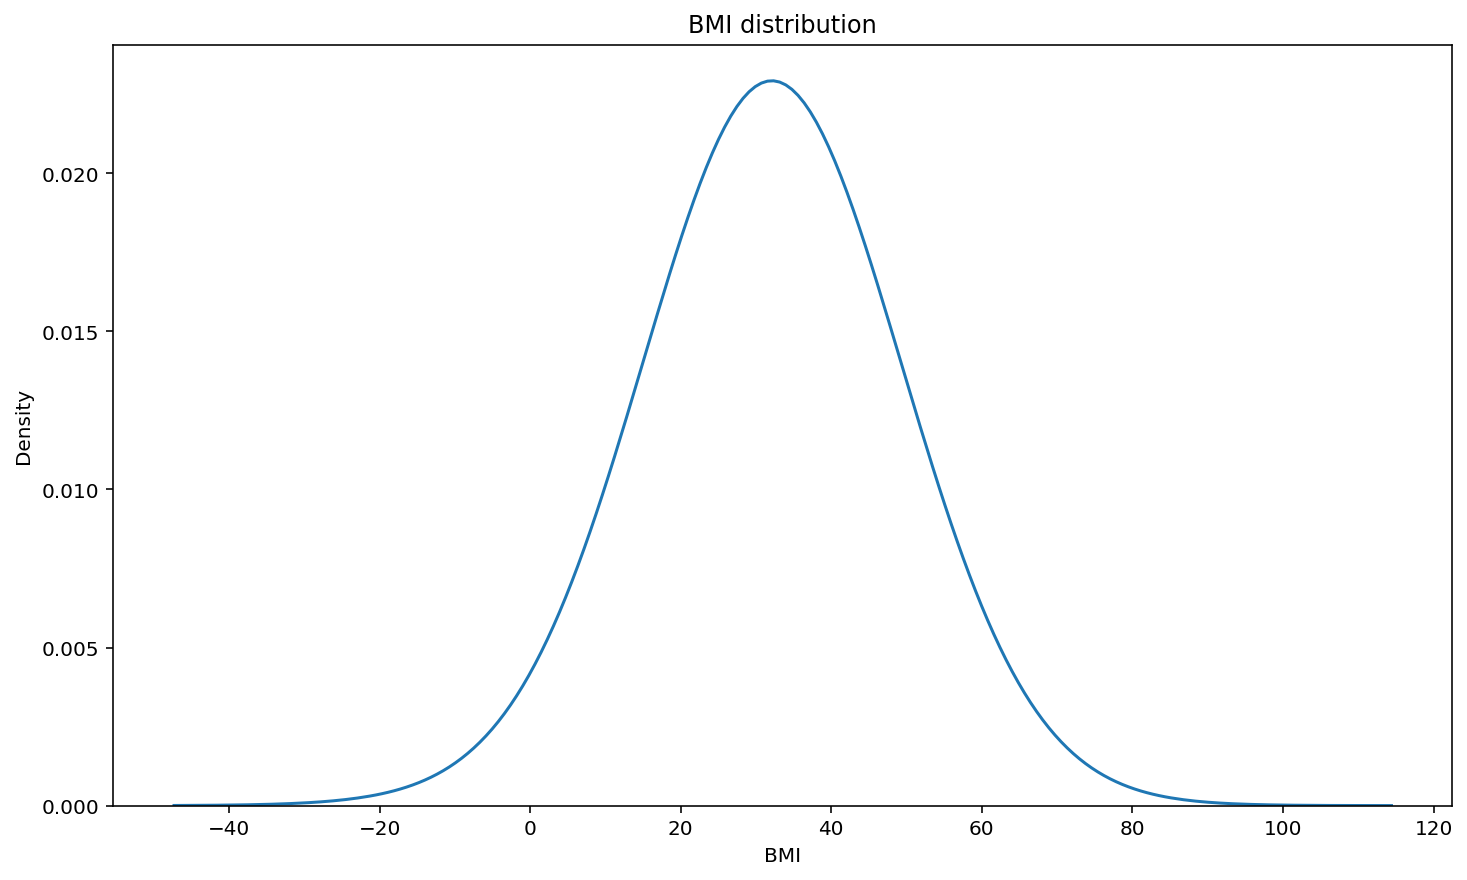

In [55]:
sns.kdeplot(bmi_df, bw=2)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI distribution')
plt.show()

In [64]:
pima_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [65]:
#Resample Dataset
from sklearn.utils import resample

In [71]:
df_majority = pima_df[pima_df.Class == 0]
df_minority = pima_df[pima_df.Class == 1]

In [73]:
# Upsampling
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 500, random_state = 123)
# combine majority and upsampled classes
pima_df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
pima_df_upsampled.Class.value_counts()

0    500
1    500
Name: Class, dtype: int64

In [75]:
# Downsample the df_majority class
df_majority_downsampled = resample(df_majority, replace = True, n_samples = 268, random_state = 123)
# combine majority and upsampled classes
pima_df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
pima_df_downsampled.Class.value_counts()

0    268
1    268
Name: Class, dtype: int64

## 4. Data preparation.

In [92]:
# Function to plot class distribution

def visualization_classes(df_name, colors = ['r', 'b']):
    labels, counts = np.unique(df_name['Class'], return_counts=True)
    plt.figure(figsize = (8, 8))
    plt.bar(labels, counts, color = colors)
    plt.gca().set_xticks(labels)
    plt.xlabel('Class', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title('Class distribution', fontsize = 18)
    plt.show()

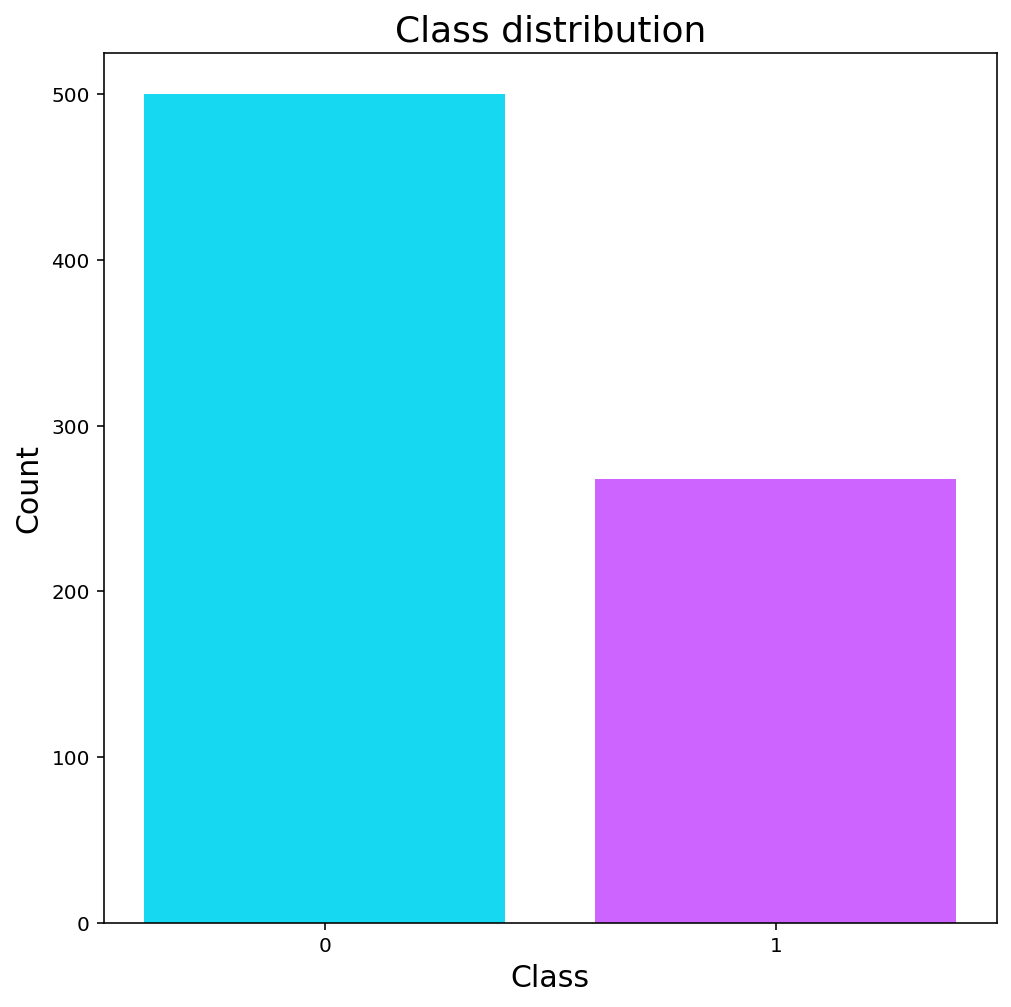

In [93]:
visualization_classes(pima_df, colors = ['#16D8F0', '#CE64FF'])

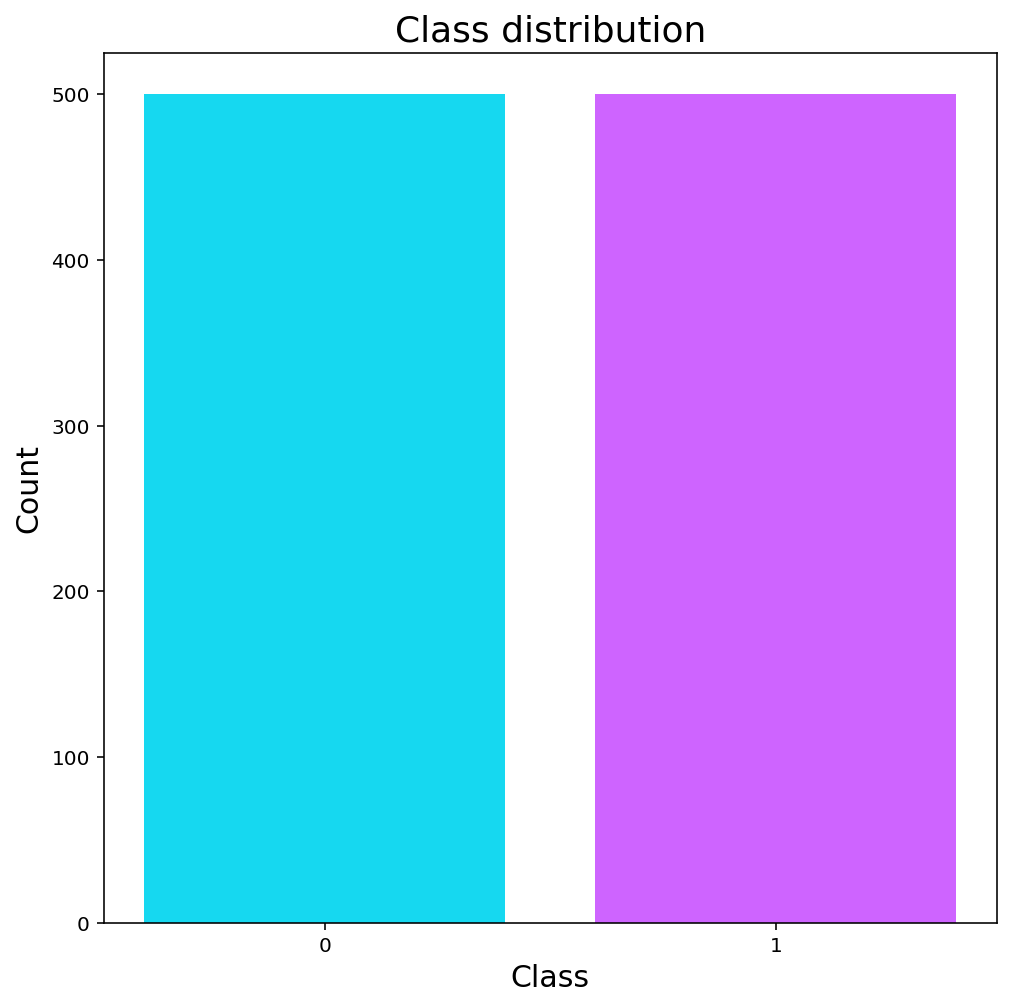

In [94]:
visualization_classes(pima_df_upsampled, colors = ['#16D8F0', '#CE64FF'])

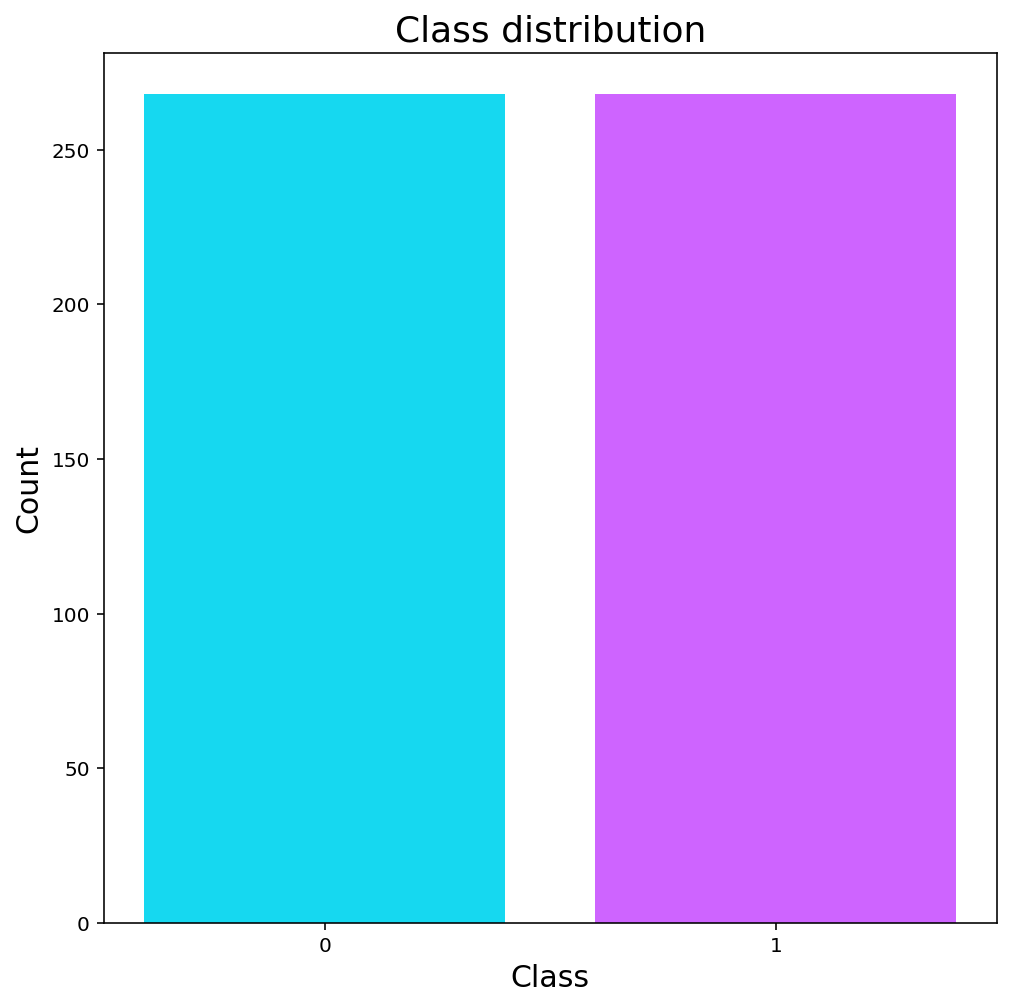

In [95]:
visualization_classes(pima_df_downsampled, colors = ['#16D8F0', '#CE64FF'])

## 5. Using PCA Decomposition.
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

he explained variance for each eigenvector (principal component) can be expressed the ratio of eigenvalue of related eigenvalue λi and sum of all eigenvalues $(λ1+λ2+…+λn)$ as the following:

$$ \frac{\lambda_i}{\lambda_1 + \lambda_2 + … +\lambda_n} $$

In [103]:
from sklearn.decomposition import PCA
pca = PCA().fit(pima_df)

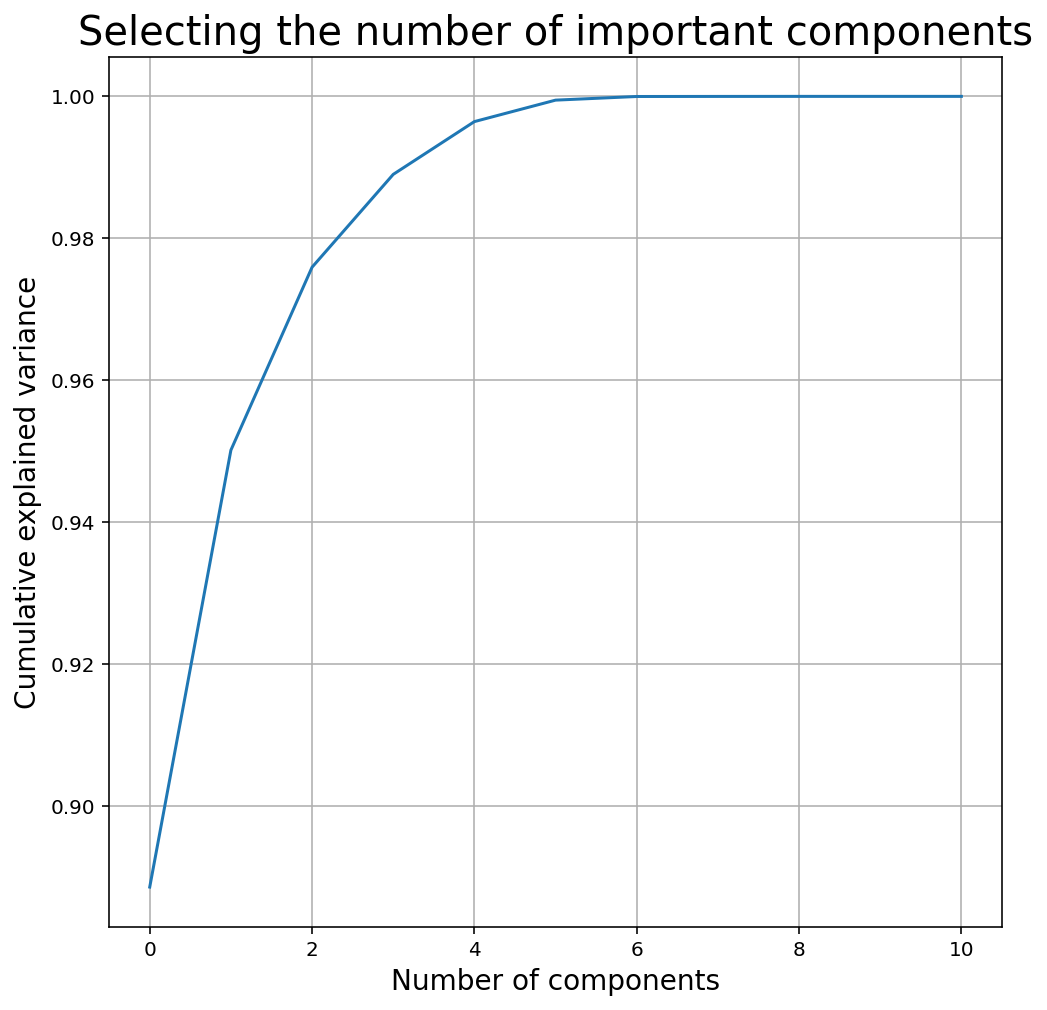

In [104]:
''' numpy.Cumsum return the cumulative sum of the elements along a given axis.'''
plt.figure(figsize= (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components', fontsize = 14)
plt.ylabel('Cumulative explained variance', fontsize = 14)
plt.title('Selecting the number of important components', fontsize = 20)
plt.grid()
plt.show()

In [106]:
# Separate data into features and labels/targets
features = pima_df_upsampled.drop('Class', 'columns')
labels = pima_df_upsampled['Class']

/tmp/ipykernel_551/726472278.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = pima_df_upsampled.drop('Class', 'columns')


In [108]:
features.describe()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,1,0
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0
mean,4.125000,125.106000,69.28000,21.350000,86.185000,32.586200,0.487257,33.814000,1.0,1.0
std,3.494794,32.606195,19.32483,16.350683,119.805209,7.641129,0.332818,11.390133,0.0,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.078000,21.000000,1.0,1.0
25%,1.000000,102.000000,64.00000,0.000000,0.000000,27.800000,0.248000,25.000000,1.0,1.0
50%,3.000000,122.000000,72.00000,24.000000,44.000000,32.800000,0.395000,30.000000,1.0,1.0
75%,6.000000,146.250000,80.00000,33.000000,135.000000,36.800000,0.654250,41.250000,1.0,1.0
max,17.000000,199.000000,122.00000,99.000000,846.000000,67.100000,2.329000,81.000000,1.0,1.0


In [109]:
labels.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Class, dtype: float64

## 6. Data Scaling.

In [112]:
# Spliting Dataset using sklearn 
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state=8)

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, Binarizer

### StandardScaler
Subtracting the mean from the data is called centering, whereas dividing by the standard deviation is called scaling. As such, the method is sometime called “center scaling“.

* A value is standardized as follows: $ y = (x – mean) / \text{standard deviation} $

* Where the mean is calculated as:$ mean = sum(x) / count(x)$
* And the standard_deviation is calculated as: $ \text{standard deviation} = sqrt( sum( (x – mean)^2 ) / count(x))$

In [125]:
# Standard Scaler
std_scaler = StandardScaler()
std_scaled_x_train = std_scaler.fit_transform(x_train)
std_scaled_x_test = std_scaler.fit_transform(x_test)
print(std_scaled_x_train[0])

[ 0.83999703 -1.32509222  0.44902234  1.15867652 -0.3142426   1.87186037
 -0.67089434  0.74955205  0.          0.        ]


### RobustScaler
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [146]:
# Rebout Scaler
rb_scaler = RobustScaler()
rb_scaled_x_train = rb_scaler.fit_transform(x_train)
rb_scaled_x_test = rb_scaler.fit_transform(x_test)
print(rb_scaled_x_train[0])

[ 0.8        -0.89130435  0.375       0.48484848  0.08214286  1.55555556
 -0.29585087  0.71641791  0.          0.        ]


## 7. Build a Model by Logistic Regression.
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’: Algorithm to use in the optimization problem.
* max_iterint, default=100: maximum number of iterations taken for the solvers to converge.

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(solver = 'lbfgs', max_iter = 60)

## 8. Training and Evaluation. 

In [157]:
LogReg.fit(x_train, y_train)
predictions = LogReg.predict(x_test)
print('Logistic Regression Model Accuracy is {}'.format(accuracy_score(y_test, predictions)))

Logistic Regression Model Accuracy is 0.808


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 9. Save the Model using pickle.

In [159]:
from pickle import dump
from pickle import load

path = 'pima_indians_model.sav'
dump(logReg, open(path, 'wb'))

In [160]:
saved_model = load(open(path, 'rb'))

## 10. Libraries Versions.

In [165]:
import matplotlib as mp
import sklearn as sk
from platform import python_version

print('Python version', python_version())
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Matplotlib version', mp.__version__)
print('Sklearn version', sk.__version__)
print('Seaborn version', sns.__version__)

Python version 3.8.10
Numpy version 1.19.5
Pandas version 1.3.2
Matplotlib version 3.4.2
Sklearn version 0.24.2
Seaborn version 0.11.2
